In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [21]:
T1_data = pd.read_csv('/content/sample_data/Titanic_train.csv')
T1_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
T1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
T1_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
T_data = T1_data.drop(columns=['Cabin'],axis=1)
T_data['Age'].fillna(T_data['Age'].mean(), inplace=True)
T_data['Embarked'].fillna(T_data['Embarked'].mode()[0], inplace=True)

In [27]:
T_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

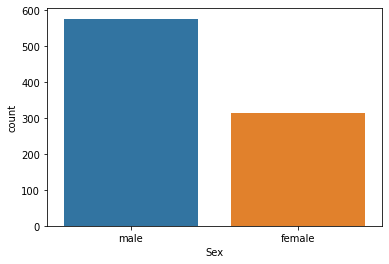

In [29]:
sns.countplot(x='Sex',data = T_data)
plt.show()

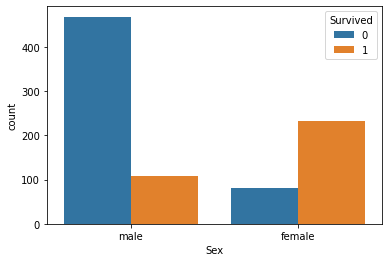

In [30]:
sns.countplot(x='Sex',hue='Survived',data= T_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


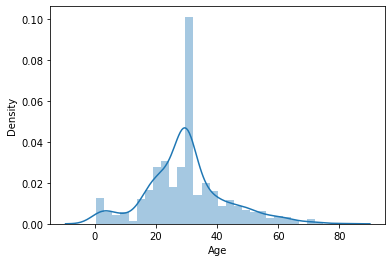

In [31]:
sns.distplot(T_data['Age'])
plt.show()

In [33]:
encoder = LabelEncoder()
T_data['Embarked'] = encoder.fit_transform(T_data['Embarked'])
T_data['Sex'] = encoder.fit_transform(T_data['Sex'])
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [34]:
X = T_data.drop(columns=['PassengerId','Name','Survived','Ticket'],axis=1)
Y = T_data['Survived']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [36]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
ypre = model.predict(x_train)
ypre_1 = model.predict(x_test)
acc = accuracy_score(y_train,ypre)
acc_1 = accuracy_score(y_test,ypre_1)
print(acc, acc_1)

0.8033707865168539 0.7988826815642458


In [38]:
model_2 = LogisticRegression()
model_2.fit(X,Y)

LogisticRegression()

In [43]:
TS_data = pd.read_csv('/content/sample_data/Titanic_test.csv')
TS_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
TS1_data = TS_data.drop('Cabin',axis=1)
TS1_data['Age'].fillna(TS1_data['Age'].mean(),inplace=True)
TS1_data['Fare'].fillna(TS1_data['Fare'].mean(),inplace=True)
TS1_data['Embarked'] = encoder.fit_transform(TS1_data['Embarked'])
TS1_data['Sex'] = encoder.fit_transform(TS1_data['Sex'])
X_test = TS1_data.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [47]:
print(X_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [51]:
Y_test_pre = model_2.predict(X_test)
print(Y_test_pre)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [53]:
TS1_data['Survived']=Y_test_pre
TS1_data['Survived'].value_counts()

0    265
1    153
Name: Survived, dtype: int64